<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/CNN/blob/main/CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
urllib.request.urlretrieve(url, "pizza_steak.zip")


('pizza_steak.zip', <http.client.HTTPMessage at 0x2a1958a3dd0>)

In [2]:
import zipfile

zipp = zipfile.ZipFile("pizza_steak.zip")  # Open the zip file
zipp.extractall()  # Extract the contents
zipp.close()  # Close the file


In [3]:
import os
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [5]:
def random_Image(direc, classs):
  folder = direc + classs
  img_path = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + "/" + img_path)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  return img

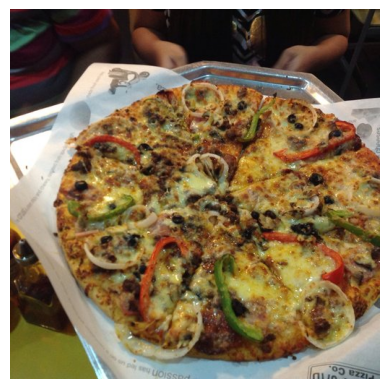

In [6]:
img = random_Image("pizza_steak/train/", "pizza")

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

#Preprocess data to get all pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)



In [8]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=25,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.


In [9]:
1500/25

60.0

In [10]:
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=25,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 500 images belonging to 2 classes.


In [11]:
500/25


20.0

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
#Compilation
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [40]:
#Fitting
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.8875 - loss: 0.2825 - val_accuracy: 0.8400 - val_loss: 0.3288
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.9186 - loss: 0.2268 - val_accuracy: 0.8780 - val_loss: 0.2952
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.9437 - loss: 0.1657 - val_accuracy: 0.8400 - val_loss: 0.4051
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.9564 - loss: 0.1204 - val_accuracy: 0.8500 - val_loss: 0.3804
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.9702 - loss: 0.0822 - val_accuracy: 0.8440 - val_loss: 0.4118


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [41]:
model.evaluate(valid_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8306 - loss: 0.4478


[0.4118167459964752, 0.843999981880188]

In [20]:
img_pizza = mpimg.imread("pizza image.jpg")

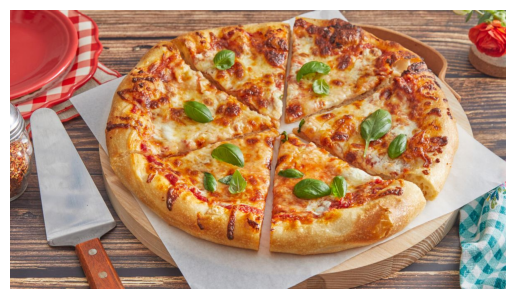

In [21]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.imshow(img_pizza)
plt.axis("off")
plt.show()

In [25]:
img_pizza.shape

(675, 1200, 3)

In [26]:
def preprocess_image(filename):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, (224, 224))
  img = img/255.
  return img

In [28]:
pizza = preprocess_image("pizza image.jpg")

In [32]:
def predict(model, img):
  pred = model.predict(tf.expand_dims(img, axis=0))
  if pred <= 0.4:
    return "Pizza"
  elif pred > 0.4 and pred <= 0.6:
    return "None of them"
  else:
    return "Steak"

In [34]:
predict(model, pizza)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'Pizza'

In [35]:
url_steak = "https://www.foodandwine.com/thmb/MT-PmMm_-6BVcPl8tbcnybIf7Vk=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg"
urllib.request.urlretrieve(url_steak, "steak.jpg")

('steak.jpg', <http.client.HTTPMessage at 0x2a1d9b32360>)

In [37]:
steak = preprocess_image("steak.jpg")

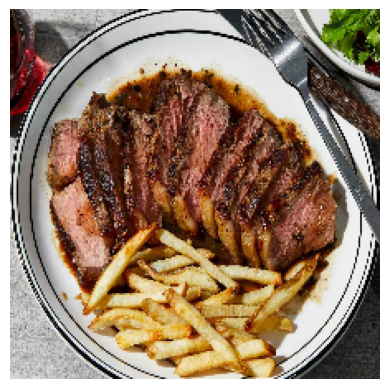

In [38]:
plt.imshow(steak)
plt.axis("off")
plt.show()

In [39]:
predict(model, steak)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'Steak'